In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cleaning Data

#### 1.1. Load the “gapminder” dataset (the same we used in class)

In [2]:
gapminder = pd.read_csv('gapminder.csv.bz2', sep="\t")

#### 1.2. Do a quick check: how many rows and columns do you have? Does the first few lines of data look reasonable?

In [3]:
print(gapminder.shape)

(13055, 25)


There are 13055 rows and 25 columns

In [4]:
print(gapminder.sample(3))

     iso3                    name iso2    region  \
3234  DOM      Dominican Republic   DO  Americas   
1308  BIH  Bosnia and Herzegovina   BA    Europe   
304   ARE    United Arab Emirates   AE      Asia   

                           sub-region intermediate-region    time  \
3234  Latin America and the Caribbean           Caribbean  2003.0   
1308                  Southern Europe                 NaN  2003.0   
304                      Western Asia                 NaN  1962.0   

      totalPopulation  fertilityRate  lifeExpectancy  ...  accessElectricity  \
3234        8850317.0          2.725          70.227  ...           89.17381   
1308        3762173.0          1.330          74.941  ...          100.00000   
304          112118.0          6.892          53.573  ...                NaN   

      agriculturalLand  agricultureTractors  cerealProduction  fertilizerHa  \
3234           24350.0                  NaN          656277.0      52.24268   
1308           21690.0             

The first few rows looks fine, although there is a bit of data with NaN values

#### 1.3. How many missing values are there in each variable? Comment the results–which variables are good, which ones nearly unusable?

In [5]:
print(gapminder.isna().sum().sort_values())

iso3                       0
time                      36
totalPopulation           76
name                     240
region                   241
sub-region               241
iso2                     300
fertilityRate           1307
lifeExpectancy          1325
agriculturalLand        1910
childMortality          2600
co2                     2658
co2_PC                  2661
GDP_PC                  3585
cerealProduction        3606
fertilizerHa            4929
greenhouseGases         4994
agricultureTractors     6947
accessElectricity       7608
intermediate-region     7697
pm2.5_35               10727
battleDeaths           12051
adultLiteracy          12118
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
dtype: int64


Variables that are good are iso3, time, totalPopulation, name, region, sub-region, iso2  

Variables that are are usable but not as good are fertilityRate, lifeExpectancy, agriculturalLand, childMortality, co2, co2_PC, GDP_PC, cerealProduction, fertilizerHa, greenhouseGases, agricultureTractors, accessElectricity, intermediate-region  

Variables that are nearly unusable are pm2.5_35, battleDeaths, adultLiteracy, youthFemaleLiteracy, youthMaleLiteracy

#### 1.4. You should notice that “time” is missing in a number of cases. This seems surprising–who on earth does not know which year is it? Analyze the cases with missing time.


In [6]:
print(gapminder[["name", "iso2", "totalPopulation"]][gapminder.time.isna()].sample(10))

                                               name iso2  totalPopulation
3491                                 Western Sahara   EH              NaN
5779                                         Jersey   JE              NaN
11610                                       Tokelau   TK              NaN
5297                                    Isle of Man   IM              NaN
1325                               Saint Barthélemy   BL              NaN
2468                                   Cook Islands   CK              NaN
964                Bonaire, Sint Eustatius and Saba   BQ              NaN
10346  South Georgia and the South Sandwich Islands   GS              NaN
8181                                     Martinique   MQ              NaN
4996              Heard Island and McDonald Islands   HM              NaN


#### 1.5. Describe what you see there. Why do you think these observations are missing?

I see that the totalPopulation is also NaN for these countries, which I think a possibility of why totalPopulationa and time would both be NaN is because the dataset did not manage to collect the data for these countries.

#### 1.6. You may also be surprised that “names” and “iso-2” codes have a different numberof missing cases. How many cases do you find where
#### • name is missing but iso-2 code is there?  
#### • iso-2 code is missing but name is there?

In [7]:
print(gapminder[["name", "iso2"]][(gapminder.name.isna()) & (gapminder.iso2.notna())].count())
print(gapminder[["name", "iso2"]][(gapminder.name.notna()) & (gapminder.iso2.isna())].count())
print(gapminder[["name", "iso2"]][(gapminder.name.notna()) & (gapminder.iso2.isna())].sample(10))

name    0
iso2    0
dtype: int64
name    60
iso2     0
dtype: int64
         name iso2
8421  Namibia  NaN
8364  Namibia  NaN
8380  Namibia  NaN
8363  Namibia  NaN
8385  Namibia  NaN
8410  Namibia  NaN
8396  Namibia  NaN
8377  Namibia  NaN
8408  Namibia  NaN
8391  Namibia  NaN


There are 0 cases where the name is missing but the code is there and there are 60 cases where the code is missing but the name is there

#### 1.7. If you did the previous question correctly, then you saw that one of the countries with missing iso-2 is Namibia. Can you figure out what is two-letter country code for Namibia? Why do you think, out of all countries, it is Namibia that has its iso-2 code missing?

The two letter country code for Namibia is NA, which can can interpretted as the Null Value for some languages, which can explain why Namibia has its iso-2 code missing.

#### 1.8. How many different countries are there in these data?

In [8]:
print(len(gapminder.iso3.unique()))

253


There are 253 different countries in these data.

#### 1.9. What is the earliest and the most recent year in the dataset?

In [9]:
print(min(gapminder.time))
print(max(gapminder.time))

1960.0
2019.0


The earliest year is 1960 and the most recent year is 2019

## 2. Wealth

#### 2.1. Find the most recent year in the data set that includes GDP data.

In [10]:
dropGDPNA = gapminder.dropna(subset = ["GDP_PC"])
print(max(dropGDPNA.time))

2019.0


The most recent year that includes GDP data is 2019

#### 2.2. What is the average wealth on this planet as of 2019? Let’s just compute average GDP per capita across all countries in 2019 and ignore the fact that countries are of different size, and the fact that some of those are not countries at all.

In [11]:
print(dropGDPNA[dropGDPNA.time == 2019].GDP_PC.mean())

15055.352217243239


The average GDP per captica for all countries in 2019 is \$15055.35

#### 2.3. But not all countries may have the same most recent year where GDP data is present. Which 5 countries countries have the largest number of the most recent years missing?

In [12]:
recentYearsGDP = dropGDPNA.groupby(["iso2", "name"], as_index = False).time.max().nsmallest(5, 'time')
print(recentYearsGDP)

    iso2                      name    time
47    DJ                  Djibouti  2010.0
61    FO             Faroe Islands  2010.0
106   LI             Liechtenstein  2010.0
175   TC  Turks and Caicos Islands  2010.0
55    ER                   Eritrea  2011.0


The 5 countries with the most recent years missing is Liechtenstein, Djibouti, Turks and Caicos Islands, Faroe Islands with 9 years missing at ending at 2010, and Eritrea with 8 years missing at ending at 2011. (Calculated using 2019 as the most recent baseline)

In [13]:
gdp = []
for i in range(len(recentYearsGDP.name)):
    gdp.append(dropGDPNA["GDP_PC"][(dropGDPNA.name == recentYearsGDP.name.iloc[i]) & (dropGDPNA.time == recentYearsGDP.time.iloc[i])].iloc[0])
print(gdp)

[1343.26873, 48530.23385, 141200.38001, 21028.40784, 537.49137]


The GDP in 2010 is about 1343.27 dollars for Dijibouti, 48530.23 dollars for Faroe Islands, 141200.38 dollars for Liechtenstein, 21028.41 dollars for Turks and Caicos Islands, and 537.49 dollars in 2011 for Eritrea.  

I think some of these countries didn't report to the agencies responsible for collecting these data or did not disclose their GDP to the general public, which is why the newer data has not been collected

#### 2.4. Now let’s compare the continents. We’ll make it easy again and just compute the average wealth (i.e. average GDP per capita) for each continent in 2019, and we use region as continent. We disregard the fact that countries are of different size. Print the continents, and the corresponding average GDP per capita. Order the continents by wealth so that the richest one is at top. Do you think this order is reasonable?

In [14]:
print(dropGDPNA[dropGDPNA.time == 2019].groupby("region").GDP_PC.mean().sort_values(ascending = False))

region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64


I do think this order is resasonable, Americas and Asia have similar economic strength while European countries tend to be more economically stronger than most countries, while countries in Africa tend to be poorer compared to the rest of the world.

## 3. Descriptive Stats

#### 3.1. First the simple descriptive statistics: compute minimum, maximum, median and mean wealth both in 1960 and 2019.

In [15]:
des1960 = dropGDPNA[dropGDPNA.time == 1960].agg({"GDP_PC":[np.min, np.max, np.median, np.mean]})
print(des1960)
des2019 = dropGDPNA[dropGDPNA.time == 2019].agg({"GDP_PC":[np.min, np.max, np.median, np.mean]})
print(des2019)

             GDP_PC
amin      153.34393
amax    33362.70762
median   1751.86291
mean     5050.29504
               GDP_PC
amin       208.074730
amax    111043.531700
median    5922.527590
mean     15055.352217


#### 3.2. What do these figures suggest? Has the world become richer? Has it become more equal/inequal? Anything else you notice here?

The world has become richer overall, but it has also became more inequal. All the values increased fro 1960 to 2019, but the minimum increased barely by 50 while the maximum grew more than 3 times. The mean also tripled and the median is close to increasing by 4 times.

#### 3.3. Plot histograms of world wealth for 1960 and 2019.

plt1960 = plt.hist(dropGDPNA[dropGDPNA.time == 1960].GDP_PC)
plt1960 = plt.show()
plt2019 = plt.hist(dropGDPNA[dropGDPNA.time == 2019].GDP_PC)
plt2019 = plt.show()

#### 3.4. Compare these histograms. Comment what do you see.

The range of poor countries GDP per capita went from 0 - 5000 in 1960 to 0 - 20000 in 2019. The shape of the graph didn't change too much, it is still extremely right skewed.

#### 3.5. Compute the quintile share ratio of GDP per capita for 1960 and 2019. What does it tell you–has inequality grown over time?

In [16]:
gdp1960 = dropGDPNA[dropGDPNA.time == 1960].GDP_PC
q20_1960, q80_1960 = np.percentile(gdp1960, [20, 80])
qsr1960 = np.sum(gdp1960[gdp1960 > q80_1960])/np.sum(gdp1960[gdp1960 < q20_1960])
print("qsr1960: " + str(qsr1960))

gdp2019 = dropGDPNA[dropGDPNA.time == 2019].GDP_PC
q20_2019, q80_2019 = np.percentile(gdp2019, [20, 80])
qsr2019 = np.sum(gdp2019[gdp2019 > q80_2019])/np.sum(gdp2019[gdp2019 < q20_2019])
print("qsr2019: " + str(qsr2019))

qsr1960: 48.44796581082919
qsr2019: 57.22513517688509


The world has gotten more unequal, the top 20% countries used to be 48 times more rich than the bottom 20% and now they are 57 times more rich.

#### 3.6. Now compute the Pareto ratio for the same two years. Will your conclusion be the same?

In [17]:
totalGDP1960 = gdp1960.sum()
threshold1960 = np.percentile(gdp1960, 80)
top20_1960 = gdp1960[gdp1960 > threshold1960].sum()
share_1960 = top20_1960/totalGDP1960
print("share_1960: " + str(share_1960))

totalGDP2019 = gdp2019.sum()
threshold2019 = np.percentile(gdp2019, 80)
top20_2019 = gdp2019[gdp2019 > threshold2019].sum()
share_2019 = top20_2019/totalGDP2019
print("share_2019: " + str(share_2019))

share_1960: 0.6737449798652131
share_2019: 0.6708162826334317


The outcome didn't match the 80/20 rule of the Pareto ration, bu it shows that the rich isn't getting richer but rather stayed the same as the rich owned about 67.38 percent of the GDP in 1960 but went down a it to 67.08 percent in 2019.

#### 3.7. What do you think–are these data useful to tell something about how the world inequality has changed over the last 60 years?

I think these data is useful to tell us about the world changing by telling us the difference between their inequality because we can tell how much the richer of the world owns compared to the poorer of the world. It showed that despite not owning the same percent of the total, the top 20 countries still owned more.

## 4. Health

#### 4.1. How many countries do not have CM data for year 1960? How many countries do not have this information for year 2019? So is data improving over time?

In [18]:
cmDataNa1960 = gapminder[(gapminder.childMortality.isna()) & (gapminder.time == 1960)].iso2.unique()
print(len(cmDataNa1960))
cmDataNa2019 = gapminder[(gapminder.childMortality.isna()) & (gapminder.time == 2019)].iso2.unique()
print(len(cmDataNa2019))

100
21


Yes there are less countries without child mortality data, in 1960 there are 100, in 2019 there are 21, which means more countries are collecting and recording data.

#### 4.2. What is the largest and smallest CM in data? Which years/countries does this correspond to?

In [19]:
print(gapminder[["name", "time", "childMortality"]].nlargest(3, "childMortality"))
print(gapminder[["name", "time", "childMortality"]].nsmallest(3, "childMortality"))

        name    time  childMortality
7703    Mali  1963.0           420.6
7704    Mali  1964.0           413.5
12817  Yemen  1962.0           409.8
             name    time  childMortality
10587  San Marino  2018.0             1.7
10588  San Marino  2019.0             1.7
10586  San Marino  2017.0             1.8


The largest CM data is Mali in 1963 with 420.6 and the smallest is San Marino in 2018 and 2019 with 1.7.

#### 4.3. For each continent, which country has the smallest and the largest CM (in 2019).

In [20]:
cmDropNa = gapminder.dropna(subset = ["childMortality"])
cm2019Max = cmDropNa[cmDropNa.time == 2019].groupby("region")["childMortality"].idxmax()
print(cm2019Max)
cm2019Min = cmDropNa[cmDropNa.time == 2019].groupby("region")["childMortality"].idxmin()
print(cm2019Min)

region
Africa      8603
Americas    5176
Asia        9144
Europe      7399
Oceania     6199
Name: childMortality, dtype: int64
region
Africa       6679
Americas     1986
Asia         2890
Europe      10588
Oceania       663
Name: childMortality, dtype: int64


In [21]:
print("Largest CM Country 2019")
for i in cm2019Max:
    print(gapminder.region.loc[i] + ": " + gapminder.name.loc[i])
print("\n")
print("Smallest CM Country 2019")
for i in cm2019Min:
    print(gapminder.region.loc[i] + ": " + gapminder.name.loc[i])

Largest CM Country 2019
Africa: Nigeria
Americas: Haiti
Asia: Pakistan
Europe: Moldova, Republic of
Oceania: Kiribati


Smallest CM Country 2019
Africa: Libya
Americas: Canada
Asia: Cyprus
Europe: San Marino
Oceania: Australia


## 5. Graphical Analysis

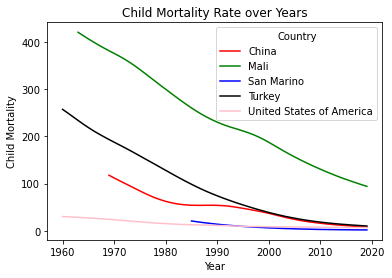

In [22]:
countryName = ["Mali", "San Marino", "Turkey", "China", "United States of America"]
lineplt = sns.lineplot(x = "time", y = "childMortality", hue = "name", palette = ['red', 'green', 'blue', 'black', 'pink'],
                       data=cmDropNa[cmDropNa.name.isin(countryName)])
lineplt = plt.title("Child Mortality Rate over Years")
lineplt = plt.xlabel("Year")
lineplt = plt.ylabel("Child Mortality")
lineplt = plt.legend(title = "Country")
lineplt = plt.show()

Mali is still the highest of the 5 countries in child mortality rate, while Turkey decreased a lot and is approaching the same number as the other 4 countries (excluding Mali). Mali, Turkey and the US started recodrding the data earlier than the other two countries. The US started out the lowest of the 5 countries but eventually San Marino became the lowest.

Took about 2 hrs